# Co-occurance marix

In [25]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix


In [26]:
strings = [
    "I like deep learning", 
    "I like NLP", 
    "I enjoy flying",
    "they enjoy flying",
    "I love eating cake",
    "I enjoy good cake",
    "I like coding",
    "they like coding"
]

p_str= '[a-zA-Z]{1,}'
pattern = re.compile(p_str, re.M)
groups = [re.findall(pattern,i) for i in strings] 
groups


[['I', 'like', 'deep', 'learning'],
 ['I', 'like', 'NLP'],
 ['I', 'enjoy', 'flying'],
 ['they', 'enjoy', 'flying'],
 ['I', 'love', 'eating', 'cake'],
 ['I', 'enjoy', 'good', 'cake'],
 ['I', 'like', 'coding'],
 ['they', 'like', 'coding']]

In [27]:
bow = []
for i in groups:
    bow += i

bow = list(set(bow))
bow

['deep',
 'cake',
 'good',
 'love',
 'like',
 'I',
 'flying',
 'NLP',
 'they',
 'enjoy',
 'eating',
 'learning',
 'coding']

In [28]:
word_map = dict(enumerate(bow))
word_inv_map = { word_map[i]:i for i in word_map }

In [29]:
word_map

{0: 'deep',
 1: 'cake',
 2: 'good',
 3: 'love',
 4: 'like',
 5: 'I',
 6: 'flying',
 7: 'NLP',
 8: 'they',
 9: 'enjoy',
 10: 'eating',
 11: 'learning',
 12: 'coding'}

## Context words association matrix

One step words

In [30]:
bigrams_maps = []
for row in groups:
    length = len(row)
    for i in range(length - 1):
        w1 = word_inv_map[row[i]]
        w2 = word_inv_map[row[i+1]]
        bigrams_maps.append([w1, w2])
        bigrams_maps.append([w2, w1])
bigrams_maps = np.array(bigrams_maps)


In [31]:
mat = csr_matrix((np.ones((bigrams_maps.shape[0])) ,
           (bigrams_maps[..., 0], bigrams_maps[..., 1]))).toarray()


In [32]:
words:list = list(word_map.values())
groups, words

([['I', 'like', 'deep', 'learning'],
  ['I', 'like', 'NLP'],
  ['I', 'enjoy', 'flying'],
  ['they', 'enjoy', 'flying'],
  ['I', 'love', 'eating', 'cake'],
  ['I', 'enjoy', 'good', 'cake'],
  ['I', 'like', 'coding'],
  ['they', 'like', 'coding']],
 ['deep',
  'cake',
  'good',
  'love',
  'like',
  'I',
  'flying',
  'NLP',
  'they',
  'enjoy',
  'eating',
  'learning',
  'coding'])

In [33]:
df = pd.DataFrame(mat, columns = words)
df.index = words
df 


,deep,cake,good,love,like,I,flying,NLP,they,enjoy,eating,learning,coding
deep,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
cake,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
good,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
love,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
like,1.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0
I,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
flying,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
NLP,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
they,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
enjoy,0.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0


## Plotting word vectors

In [34]:
from sklearn.decomposition import PCA
pc = PCA(n_components=2).fit_transform(mat)

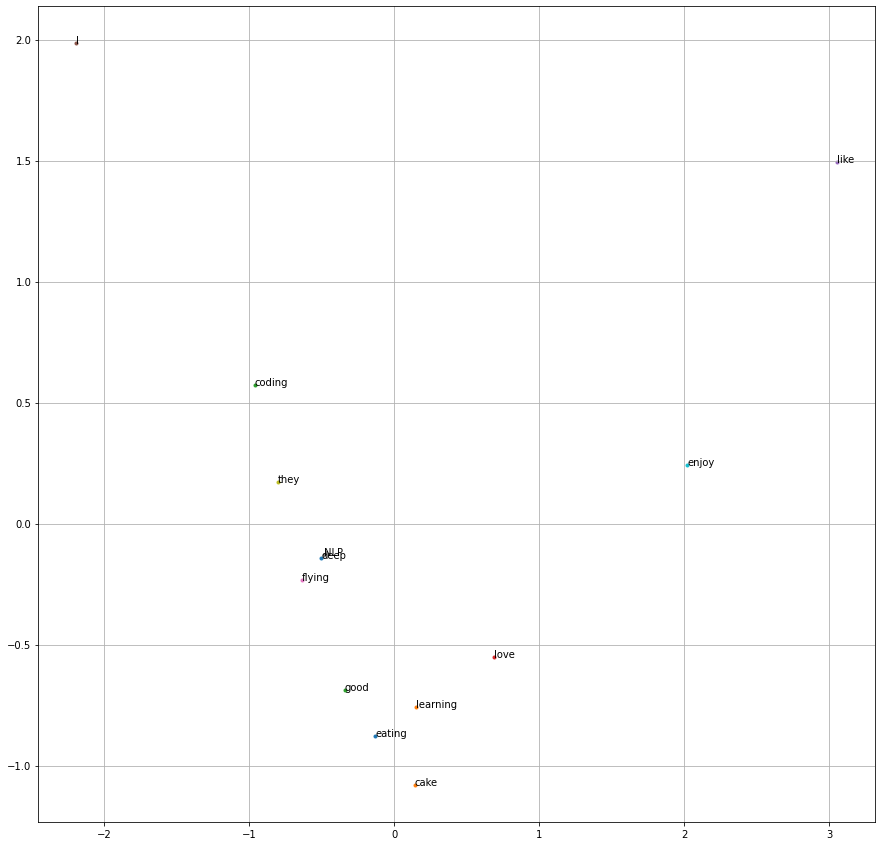

In [35]:
fig,ax = plt.subplots(1,1,figsize=(15,15))
for i in range(len(pc)):
    ax.scatter(pc[i,0],pc[i,1],marker='.')
    ax.text(pc[i,0],pc[i,1],words[i])

plt.grid()
plt.show()

In [36]:
from scipy.spatial.distance import cosine

In [37]:
def cosine_distance(word1, word2):
    return cosine(df.loc[word1].values, df.loc[word2].values)


In [38]:
cosine_distance('like','enjoy')

0.4466014094705336

In [39]:
cosine_distance('like', 'love')

0.4696699141100893

In [40]:
cosine_distance('enjoy', 'love')

0.5527864045000421

In [41]:
cosine_distance('like', 'learning')

0.75

In [42]:
cosine_distance('flying', 'learning')

1.0

In [43]:
cosine_distance('I', 'they')


0.05508881747693195